In [ ]:
import tensorflow as tf

## Handwriting digits 0-9 detector

In [49]:
mnist = tf.keras.datasets.mnist #28x28 images of hand-writing digits 0-9

(x_train, y_trian), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.elu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.elu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_trian, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3099 - accuracy: 0.9085
Epoch 2/3
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1519 - accuracy: 0.9537
Epoch 3/3
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1060 - accuracy: 0.9669


In [50]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10798216426372528 0.9667


In [52]:
model.save('handwriting_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: handwriting_reader.model/assets


In [54]:
predictions = model.predict([x_test])

In [59]:
import numpy as np
print(np.argmax(predictions[9]))

9


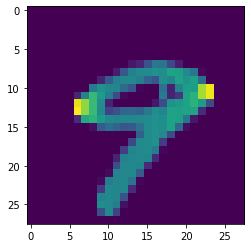

In [61]:
plt.imshow(x_test[9])
plt.show()

## Dogs vs cats images detector

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [167]:
path = "/Users/zmn/Downloads/dogs-vs-cats/train/"
training_data = []
IMG_SIZE = 100
for img in os.listdir(path):
    try: 
        class_num = 0 if img[0]=="d" else 1
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([resize_array, class_num])
    except Exception as e:
        pass
    

a cat


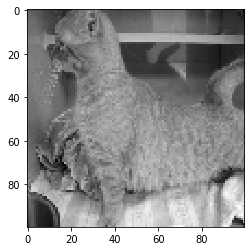

In [168]:
plt.imshow(resize_array, cmap="gray")
it = "a dog" if training_data[-1][1] == 0 else "a cat"
print(it)

In [169]:
import random
random.shuffle(training_data)

In [170]:
X = []
y = [] 
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [180]:
len(y)

25000

In [183]:
x_train = X[:20000]
y_train = y[:20000]
x_test = X[20000:]
y_test= y[20000:]

In [184]:
len(x_test)

5000

In [188]:
import pickle

pickle_out = open("./dog_vs_cat_data/x_train.pickle", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("./dog_vs_cat_data/y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("./dog_vs_cat_data/x_test.pickle", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("./dog_vs_cat_data/y_test.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [191]:
pickle_in = open("./dog_vs_cat_data/x_train.pickle", "rb")
x_train= pickle.load(pickle_in)